In [1]:
#!/usr/bin/env python

In [5]:
# Se importan las librerías necesarias

import MySQLdb
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys  
import json
from IPython.display import HTML
import seaborn as sb

import matplotlib.transforms as mtransforms
import itertools



from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import StratifiedKFold
from math import pi
import warnings

warnings.filterwarnings("ignore")

ImportError: No module named MySQLdb

In [3]:
# Se utiliza codificicación latin para mostrar los textos

#reload(sys)  
#sys.setdefaultencoding('latin-1')

#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

# Para ver el tipo de codificación
#sys.stdout.encoding

In [4]:
# Conexión con la base de datos

db = MySQLdb.connect(host ="localhost",    
                     user="kevin",         
                     passwd="4015",  
                     db="moodle")        

# Se leen los datos de las encuestas

df1 = pd.read_sql('SELECT * FROM mdl_feedback_item', con=db)
df2 = pd.read_sql('SELECT * FROM mdl_feedback_value', con=db)
df3 = pd.read_sql('SELECT * FROM mdl_user', con=db)

# Se cierra la conección con la base de datos

db.close()

In [5]:
# Se forma una dataframe con las preguntas

df1 = df1[df1.hasvalue != 0]
df1 = df1.rename(columns={'name': 'question'})
df1 = df1.rename(columns={'position': 'question_id'})

df_questions = df1[['question_id', 'question']]

df_questions.head(3)

,question_id,question
1,2,Me preocupo por las cosas
2,3,Creo que hago amigos f�cilmente
3,4,Tengo una imaginaci�n v�vida (muy imaginativo)


In [6]:
# Se crea una lista con las preguntas

lista_questions = df_questions['question']

In [7]:
# Se crea un dataframe con las respuestas de cada alumno a las preguntas

df2 = df2.rename(columns={'item': 'question_id'})
df2 = df2.rename(columns={'completed': 'student'})
df2 = df2.rename(columns={'value': 'answer'})

df_answers = df2[['student', 'question_id','answer']]
df_answers.head(3)

,student,question_id,answer
0,1,2,1
1,1,3,2
2,1,4,3


In [8]:
df_names = df3[['id', 'username','idnumber','firstname','lastname','mnethostid']]
df_names

,id,username,idnumber,firstname,lastname,mnethostid
0,1,guest,,Guest user,,1
1,2,admin,,Kevin,Calle,1
2,3,jonas,,jonas,davalos,1
3,4,juan,,juan,perez,1
4,5,luis,,Luis,Chica,1
5,6,juanloza,,Juan,Loza,1


In [9]:
# Se crea un dataframe con el id del alumno, las preguntas, y las respuestas

data = pd.merge(df_questions, df_answers)
data = data[['student', 'question', 'question_id', 'answer']]
data = data.sort_values(by=['student', 'question_id'])
data = data.reset_index(drop=True)
data.head(3)

,student,question,question_id,answer
0,1,Me preocupo por las cosas,2,1
1,1,Creo que hago amigos f�cilmente,3,2
2,1,Tengo una imaginaci�n v�vida (muy imaginativo),4,3


In [10]:
# Se guarda el nombre de las columnas del dataframe data

colnames = list(data.columns.values)

In [11]:
# Se comprueba las posiciones de la primera pregunta para cada estudiante

parte1 = data[data['question'] == 'Me preocupo por las cosas']
parte1

,student,question,question_id,answer
0,1,Me preocupo por las cosas,2,1
120,2,Me preocupo por las cosas,2,1
240,3,Me preocupo por las cosas,2,1


In [12]:
# Se forma el dataset final agrupando por estudiantes

group_by_student = data.pivot(columns='question', index='student', 
                               values='answer').reset_index()

# Se elimina el nombre de la columna generado en el pivot

del group_by_student.columns.name

# Se crea un dataset con el id del estudiante y sus respuestas

group_by_student = group_by_student[lista_questions]
student_col = parte1['student'].reset_index().drop('index', axis = 1)

# Se inserta el id del estudiante en la primera columna

group_by_student.insert(loc = 0, column = 'student', value = student_col)

In [13]:
group_by_student

,student,Me preocupo por las cosas,Creo que hago amigos f�cilmente,Tengo una imaginaci�n v�vida (muy imaginativo),Confio en los dem�s,Completo las tareas correctamente,Suelo enojarme f�cilmente,Me encantan las fiestas grandes,Creo que el arte es importante,Colaboro con otros solo si obtengo alg�n beneficio propio,...,"""Siempre puedo controlar mis antojos""","""Creo que soy una persona activa y vigorosa""","""No me interesan las discusiones te�ricas""","""Me jacto de mis virtudes""","""Tengo dificultad para comenzar tareas""","""Me mantengo tranquilo/a bajo presi�n""","""Siempre miro el buen lado de la vida""","""Creo que deber�amos ser severos con el crimen""","""Trato de no pensar en los necesitados""","""Act�o sin pensar"""
0,1,1,2,3,3,3,3,3,2,5,...,5,3,3,3,3,2,3,4,3,3
1,2,1,2,3,3,2,5,5,5,5,...,5,4,3,5,4,1,1,4,4,4
2,3,1,2,3,4,5,5,4,3,2,...,3,2,2,3,4,4,4,3,1,5


# Dataset de pruebas

In [14]:
# Dataset importado desde excel

# Se importan los datos en formato .csv

group_1 = pd.read_csv('Grp1_MN_Com_TRP_52P.csv', sep=';', encoding='latin-1')
group_2 = pd.read_csv('Grp2_MN_Elt_TRP_52.csv', sep=';', encoding='latin-1')
group_3 = pd.read_csv('Grp3_MN_Elt_TRP_52.csv', sep=';', encoding='latin-1')

# se eliminan las filas sin nombre del dataset group_1

group_1 = group_1.loc[:, ~group_1.columns.str.contains('^Unnamed')]

# Se cuenta el numero de filas y columnas de los 3 grupos

print("El grupo 1 tiene " + str(len(group_1.columns)) + " columnas y " + str(len(group_1.index) + 1) + " filas")
print("El grupo 2 tiene " + str(len(group_2.columns)) + " columnas y " + str(len(group_2.index) + 1) + " filas")
print("El grupo 3 tiene " + str(len(group_3.columns)) + " columnas y " + str(len(group_3.index) + 1) + " filas")

# Se guarda el nombre de las columnas en una lista

column_list = list(group_1.columns)

# Se nombran las columnas de los tres grupos de la misma manera

group_1.columns = column_list
group_2.columns = column_list
group_3.columns = column_list

# Se unen los 3 grupos dentro de un mismo dataframe

union_gr1_gr2 = group_1.append(group_2, ignore_index=True)
group_by_student_2 = union_gr1_gr2.append(group_3, ignore_index=True)
#group_by_student_2.head(3)

#group_by_student_2 = group_by_student_2.drop(["Dirección de correo", "Fecha"], axis=1)
group_by_student_2 = group_by_student_2.drop(group_by_student_2.columns[1], axis=1)
group_by_student_2 = group_by_student_2.drop(group_by_student_2.columns[1], axis=1)
group_by_student_2.head(5)

# Dataset Para pruebas

group_by_student = group_by_student_2
group_by_student.head(5)


El grupo 1 tiene 123 columnas y 27 filas
El grupo 2 tiene 123 columnas y 21 filas
El grupo 3 tiene 123 columnas y 16 filas


,Nombre completo del usuario,Me preocupo por las cosas,Creo que hago amigos fácilmente,Tengo una imaginación vívida (muy imaginativo),Confio en los demás,Completo las tareas correctamente,Suelo enojarme fácilmente,Me encantan las fiestas grandes,Creo que el arte es importante,Colaboro con otros solo si obtengo algún beneficio propio,...,"""Siempre puedo controlar mis antojos""","""Creo que soy una persona activa y vigorosa""","""No me interesan las discusiones teóricas""","""Me jacto de mis virtudes""","""Tengo dificultad para comenzar tareas""","""Me mantengo tranquilo/a bajo presión""","""Siempre miro el buen lado de la vida""","""Creo que deberíamos ser severos con el crimen""","""Trato de no pensar en los necesitados""","""Actúo sin pensar"""
0,José Estean Calle Chuchuca,5,4,4,4,4,4,5,5,3,...,3,4,5,4,2,3,3,4,2,2
1,Pablo Sebastian Calle Ortega,4,1,3,2,2,1,2,5,2,...,2,2,2,1,1,4,3,2,2,2
2,Tatiana Domenica Cardenas Jho,5,4,4,2,4,3,3,4,2,...,4,5,2,3,2,3,4,3,2,1
3,Francis Mateo Cordova Alvarez,4,4,5,5,4,3,5,5,3,...,3,4,2,4,5,4,3,2,3,3
4,Wilmer Jhon Durazno Zapatanga,5,2,5,3,4,4,1,4,2,...,3,3,2,3,3,3,5,5,1,1


In [15]:
# Se ve el número de pregunta

#pregunta = 118

#i = pregunta - 1
#data['question'][i]

In [16]:
# Ecuación para sumar una pregunta de forma inversa
#((int(group_by_student.iloc[0][96])-(int(group_by_student.iloc[0][96])*2))+6)

# Se obtiene el valor de una respuesta en cierta posición
#int(group_by_student.iloc[2][4])

In [17]:
# Tamaño del dataset

len(group_by_student.index)

61

In [18]:
# Se forma el dominio N

N = 0
N_values = []

for m in range(len(group_by_student.index)):
    
    N = (int(group_by_student.iloc[m][1]) + 
        int(group_by_student.iloc[m][6]) +
        int(group_by_student.iloc[m][11]) +
        int(group_by_student.iloc[m][16]) +
        int(group_by_student.iloc[m][21]) +
        int(group_by_student.iloc[m][26]) +
        
        int(group_by_student.iloc[m][31]) +
        int(group_by_student.iloc[m][36]) +
        int(group_by_student.iloc[m][41]) +
        int(group_by_student.iloc[m][46]) +
        ((int(group_by_student.iloc[m][51])-(int(group_by_student.iloc[m][51])*2))+6) +
        int(group_by_student.iloc[m][56]) +
        
        int(group_by_student.iloc[m][61]) +
        int(group_by_student.iloc[m][66]) +
        int(group_by_student.iloc[m][71]) +
        int(group_by_student.iloc[m][76]) +
        ((int(group_by_student.iloc[m][81])-(int(group_by_student.iloc[m][81])*2))+6) +
        int(group_by_student.iloc[m][86]) +
         
        int(group_by_student.iloc[m][91]) +
        ((int(group_by_student.iloc[m][96])-(int(group_by_student.iloc[m][96])*2))+6) +
        ((int(group_by_student.iloc[m][101])-(int(group_by_student.iloc[m][101])*2))+6) +
        ((int(group_by_student.iloc[m][106])-(int(group_by_student.iloc[m][106])*2))+6) +
        ((int(group_by_student.iloc[m][111])-(int(group_by_student.iloc[m][111])*2))+6) +
        ((int(group_by_student.iloc[m][116])-(int(group_by_student.iloc[m][116])*2))+6)
         
        )
    
    N_values.append(N) 
    
print N_values

[73, 73, 61, 83, 81, 71, 93, 78, 59, 73, 77, 67, 76, 77, 61, 83, 81, 65, 79, 74, 64, 63, 56, 74, 83, 75, 78, 59, 84, 85, 81, 83, 100, 73, 71, 72, 48, 65, 45, 73, 89, 66, 69, 81, 69, 86, 81, 83, 63, 59, 77, 77, 74, 50, 84, 63, 76, 78, 75, 74, 77]


In [19]:
# Se forma el dominio E

E = 0
E_values = []

for m in range(len(group_by_student.index)):
    
    E = (int(group_by_student.iloc[m][2]) + 
        int(group_by_student.iloc[m][7]) +
        int(group_by_student.iloc[m][12]) +
        int(group_by_student.iloc[m][17]) +
        int(group_by_student.iloc[m][22]) +
        int(group_by_student.iloc[m][27]) +
        
        int(group_by_student.iloc[m][32]) +
        int(group_by_student.iloc[m][37]) +
        int(group_by_student.iloc[m][42]) +
        int(group_by_student.iloc[m][47]) +
        int(group_by_student.iloc[m][52]) +
        int(group_by_student.iloc[m][57]) +
        
        ((int(group_by_student.iloc[m][62])-(int(group_by_student.iloc[m][62])*2))+6) +
        ((int(group_by_student.iloc[m][67])-(int(group_by_student.iloc[m][67])*2))+6) +
        int(group_by_student.iloc[m][72]) +
        int(group_by_student.iloc[m][77]) +
        int(group_by_student.iloc[m][82]) +
        int(group_by_student.iloc[m][87]) +
         
        ((int(group_by_student.iloc[m][92])-(int(group_by_student.iloc[m][92])*2))+6) +
        ((int(group_by_student.iloc[m][97])-(int(group_by_student.iloc[m][97])*2))+6) +
        ((int(group_by_student.iloc[m][102])-(int(group_by_student.iloc[m][102])*2))+6) +
        ((int(group_by_student.iloc[m][107])-(int(group_by_student.iloc[m][107])*2))+6) +
        int(group_by_student.iloc[m][112]) +
        int(group_by_student.iloc[m][117])
         
        )
    
    E_values.append(E) 
    
print E_values

[85, 40, 77, 78, 76, 84, 93, 77, 98, 94, 78, 83, 79, 84, 77, 78, 76, 73, 96, 99, 98, 76, 94, 89, 82, 66, 69, 89, 96, 97, 100, 80, 95, 71, 75, 68, 81, 72, 98, 93, 56, 80, 91, 97, 79, 70, 79, 66, 94, 84, 90, 90, 77, 65, 75, 94, 85, 87, 78, 78, 95]


In [20]:
# Se forma el dominio O

O = 0
O_values = []

for m in range(len(group_by_student.index)):
    
    O = (int(group_by_student.iloc[m][3]) + 
        int(group_by_student.iloc[m][8]) +
        int(group_by_student.iloc[m][13]) +
        int(group_by_student.iloc[m][18]) +
        int(group_by_student.iloc[m][23]) +
        int(group_by_student.iloc[m][28]) +
        
        int(group_by_student.iloc[m][33]) +
        int(group_by_student.iloc[m][38]) +
        int(group_by_student.iloc[m][43]) +
        ((int(group_by_student.iloc[m][48])-(int(group_by_student.iloc[m][48])*2))+6) +
        ((int(group_by_student.iloc[m][53])-(int(group_by_student.iloc[m][53])*2))+6) +
        int(group_by_student.iloc[m][58]) +
        
        int(group_by_student.iloc[m][63]) +
        ((int(group_by_student.iloc[m][68])-(int(group_by_student.iloc[m][68])*2))+6) +
        ((int(group_by_student.iloc[m][73])-(int(group_by_student.iloc[m][73])*2))+6) +
        ((int(group_by_student.iloc[m][78])-(int(group_by_student.iloc[m][78])*2))+6) +
        ((int(group_by_student.iloc[m][83])-(int(group_by_student.iloc[m][83])*2))+6) +
        ((int(group_by_student.iloc[m][88])-(int(group_by_student.iloc[m][88])*2))+6) +
         
        int(group_by_student.iloc[m][93]) +
        ((int(group_by_student.iloc[m][98])-(int(group_by_student.iloc[m][98])*2))+6) +
        ((int(group_by_student.iloc[m][103])-(int(group_by_student.iloc[m][103])*2))+6) +
        ((int(group_by_student.iloc[m][108])-(int(group_by_student.iloc[m][108])*2))+6) +
        ((int(group_by_student.iloc[m][113])-(int(group_by_student.iloc[m][113])*2))+6) +
        ((int(group_by_student.iloc[m][118])-(int(group_by_student.iloc[m][118])*2))+6)
         
        )
    
    O_values.append(O) 
    
print O_values

[95, 75, 83, 82, 82, 81, 95, 99, 82, 78, 69, 85, 64, 75, 83, 82, 82, 71, 71, 92, 73, 75, 83, 73, 68, 72, 88, 68, 86, 88, 78, 81, 86, 78, 90, 90, 82, 75, 83, 84, 76, 81, 82, 80, 75, 78, 84, 89, 75, 84, 87, 87, 72, 77, 69, 75, 72, 74, 84, 80, 87]


In [21]:
# Se forma el dominio A

A = 0
A_values = []

for m in range(len(group_by_student.index)):
    
    A = (int(group_by_student.iloc[m][4]) + 
        ((int(group_by_student.iloc[m][9])-(int(group_by_student.iloc[m][9])*2))+6) +
        int(group_by_student.iloc[m][14]) +
        ((int(group_by_student.iloc[m][19])-(int(group_by_student.iloc[m][19])*2))+6) +
        ((int(group_by_student.iloc[m][24])-(int(group_by_student.iloc[m][24])*2))+6) +
        int(group_by_student.iloc[m][29]) +
        
        int(group_by_student.iloc[m][34]) +
        ((int(group_by_student.iloc[m][39])-(int(group_by_student.iloc[m][39])*2))+6) +
        int(group_by_student.iloc[m][44]) +
        ((int(group_by_student.iloc[m][49])-(int(group_by_student.iloc[m][49])*2))+6) +
        ((int(group_by_student.iloc[m][54])-(int(group_by_student.iloc[m][54])*2))+6) +
        int(group_by_student.iloc[m][59]) +
        
        int(group_by_student.iloc[m][64]) +
        ((int(group_by_student.iloc[m][69])-(int(group_by_student.iloc[m][69])*2))+6) +
        ((int(group_by_student.iloc[m][74])-(int(group_by_student.iloc[m][74])*2))+6) +
        ((int(group_by_student.iloc[m][79])-(int(group_by_student.iloc[m][79])*2))+6) +
        ((int(group_by_student.iloc[m][84])-(int(group_by_student.iloc[m][84])*2))+6) +
        ((int(group_by_student.iloc[m][89])-(int(group_by_student.iloc[m][89])*2))+6) +
         
        ((int(group_by_student.iloc[m][94])-(int(group_by_student.iloc[m][94])*2))+6) +
        ((int(group_by_student.iloc[m][99])-(int(group_by_student.iloc[m][99])*2))+6) +
        ((int(group_by_student.iloc[m][104])-(int(group_by_student.iloc[m][104])*2))+6) +
        ((int(group_by_student.iloc[m][109])-(int(group_by_student.iloc[m][109])*2))+6) +
        ((int(group_by_student.iloc[m][114])-(int(group_by_student.iloc[m][114])*2))+6) +
        ((int(group_by_student.iloc[m][119])-(int(group_by_student.iloc[m][119])*2))+6)
         
        )
    
    A_values.append(A) 
    
print A_values

[96, 93, 81, 75, 85, 78, 63, 61, 84, 85, 77, 81, 67, 85, 81, 75, 85, 78, 72, 91, 82, 83, 80, 78, 78, 56, 68, 88, 79, 97, 63, 82, 82, 89, 87, 69, 79, 100, 89, 84, 80, 82, 79, 88, 84, 83, 92, 81, 74, 98, 95, 95, 89, 82, 68, 74, 79, 87, 84, 85, 76]


In [22]:
# Se forma el dominio C

C = 0
C_values = []

for m in range(len(group_by_student.index)):
    
    C = (int(group_by_student.iloc[m][5]) + 
        int(group_by_student.iloc[m][10]) +
        int(group_by_student.iloc[m][15]) +
        int(group_by_student.iloc[m][20]) +
        int(group_by_student.iloc[m][25]) +
        ((int(group_by_student.iloc[m][30])-(int(group_by_student.iloc[m][30])*2))+6) +
        
        int(group_by_student.iloc[m][35]) +
        ((int(group_by_student.iloc[m][40])-(int(group_by_student.iloc[m][40])*2))+6) +
        int(group_by_student.iloc[m][45]) +
        int(group_by_student.iloc[m][50]) +
        int(group_by_student.iloc[m][55]) +
        ((int(group_by_student.iloc[m][60])-(int(group_by_student.iloc[m][60])*2))+6) +
        
        int(group_by_student.iloc[m][65]) +
        ((int(group_by_student.iloc[m][70])-(int(group_by_student.iloc[m][70])*2))+6) +
        ((int(group_by_student.iloc[m][75])-(int(group_by_student.iloc[m][75])*2))+6) +
        ((int(group_by_student.iloc[m][80])-(int(group_by_student.iloc[m][80])*2))+6) +
        ((int(group_by_student.iloc[m][85])-(int(group_by_student.iloc[m][85])*2))+6) +
        ((int(group_by_student.iloc[m][90])-(int(group_by_student.iloc[m][90])*2))+6) +
         
        int(group_by_student.iloc[m][95]) +
        ((int(group_by_student.iloc[m][100])-(int(group_by_student.iloc[m][100])*2))+6) +
        ((int(group_by_student.iloc[m][105])-(int(group_by_student.iloc[m][105])*2))+6) +
        ((int(group_by_student.iloc[m][110])-(int(group_by_student.iloc[m][110])*2))+6) +
        ((int(group_by_student.iloc[m][115])-(int(group_by_student.iloc[m][115])*2))+6) +
        ((int(group_by_student.iloc[m][120])-(int(group_by_student.iloc[m][120])*2))+6)
         
        )
    
    C_values.append(C) 
    
print C_values

[93, 69, 98, 71, 90, 77, 82, 77, 85, 90, 86, 99, 82, 82, 98, 71, 90, 72, 79, 87, 78, 76, 85, 84, 84, 54, 73, 89, 68, 93, 56, 47, 86, 75, 78, 75, 103, 99, 101, 83, 64, 91, 74, 74, 88, 73, 99, 84, 80, 97, 106, 106, 80, 96, 66, 80, 86, 82, 87, 75, 85]


In [23]:
# Se crea el dataframe con el dominio para cada estudiante

dominios = pd.DataFrame(columns = ['Name', 'N', 'E', 'O', 'A', 'C'])
dominios['Name'] = group_by_student['Nombre completo del usuario']
dominios['N'] = N_values
dominios['E'] = E_values
dominios['O'] = O_values
dominios['A'] = A_values
dominios['C'] = C_values

dominios['Categoria'] = dominios[['N','E','O','A','C']].idxmax(1).str.replace('Cat','')

# Se inserta el id del estudiante en la primera columna

#dominios.insert(loc = 0, column = 'student', value = student_col)

dominios.head(5)

,Name,N,E,O,A,C,Categoria
0,José Estean Calle Chuchuca,73,85,95,96,93,A
1,Pablo Sebastian Calle Ortega,73,40,75,93,69,A
2,Tatiana Domenica Cardenas Jho,61,77,83,81,98,C
3,Francis Mateo Cordova Alvarez,83,78,82,75,71,N
4,Wilmer Jhon Durazno Zapatanga,81,76,82,85,90,C


# K - Means

In [24]:
# Parámetros de las figuras

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

<Figure size 1152x648 with 0 Axes>

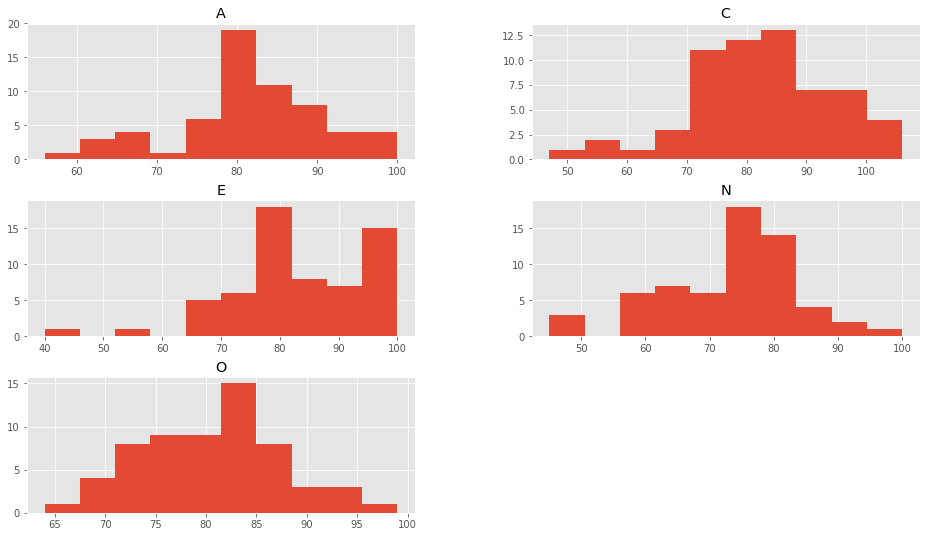

In [25]:
# Se observa el hitograma de cada categoría

plt.figure()
dominios.drop(['Categoria'],1).hist()
plt.savefig("/var/www/html/hist_dominios.png")

In [26]:
# Se separa las características de las categorías

X = np.array(dominios[["O","E","A","N","C"]])
y = np.array(dominios['Categoria'])
print X.shape
print y.shape

(61, 5)
(61,)


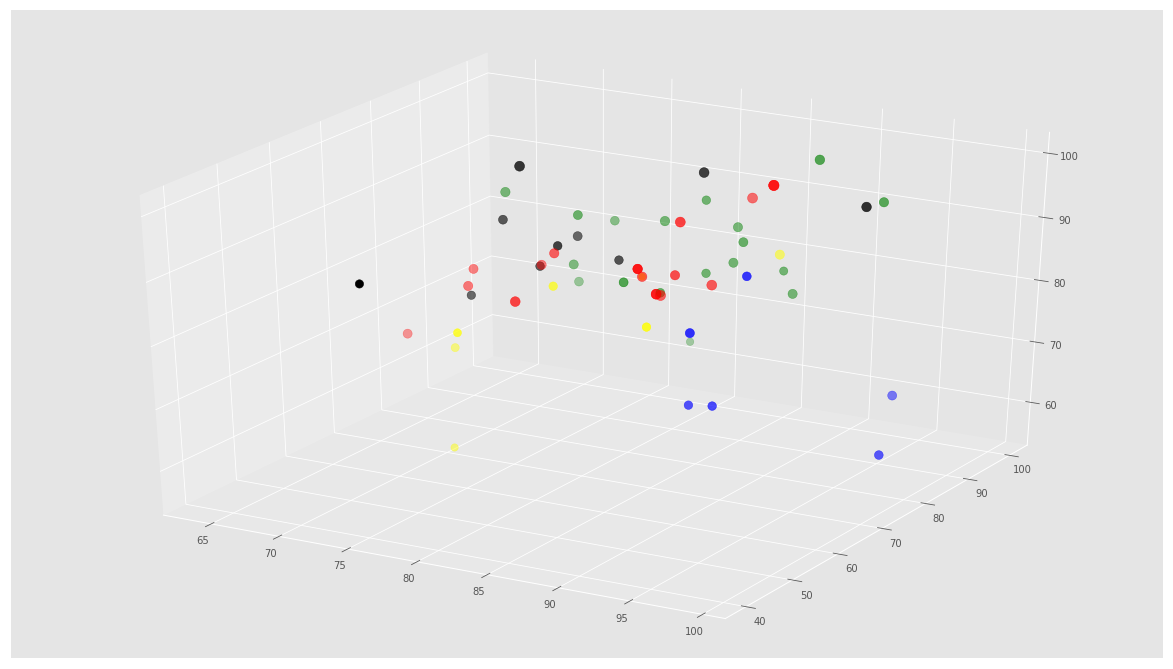

In [27]:
# Se grafica la distribución de las muestras vistas desde 3 características

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','black','yellow']
asignar=[]
for row in y:
    if row is "O":
        row = 0
    if row is "C":
        row = 1
    if row is "E":
        row = 2
    if row is "A":
        row = 3
    if row is "N":
        row = 4
    asignar.append(colores[row])
    
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], c=asignar)

In [28]:
# Se observa la cantidad de categorías por mayor predominio

dominios.groupby('Categoria').size()

Categoria
A    10
C    18
E    19
N     8
O     6
dtype: int64

In [29]:
# Se aplica K Means para separar por rasgos similares

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_

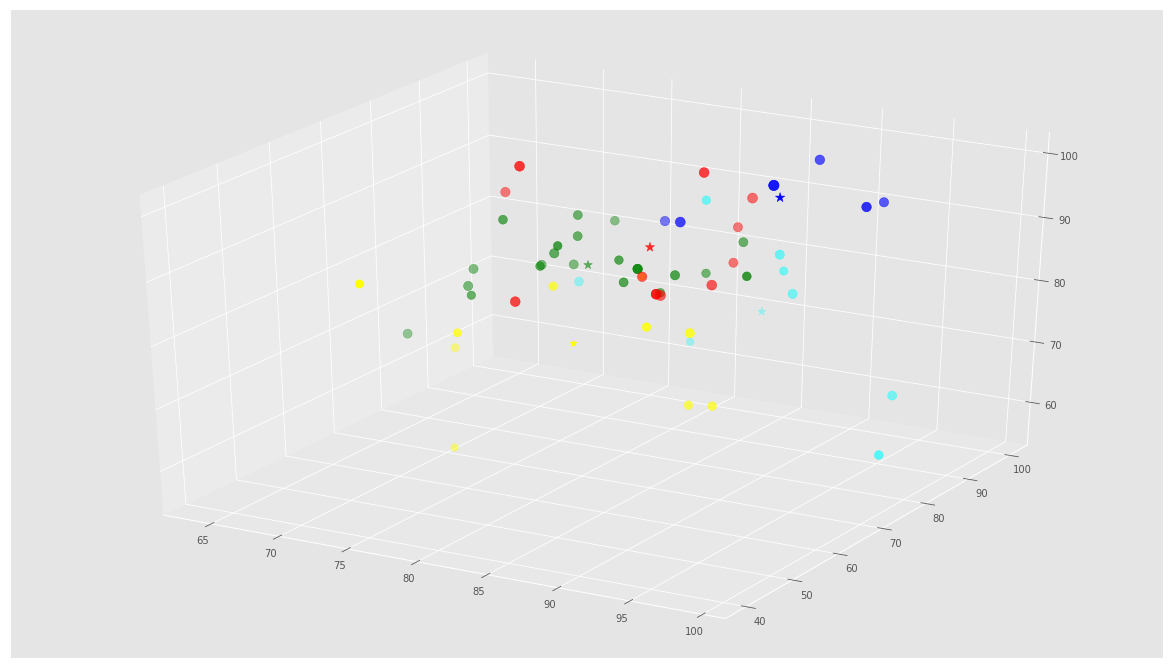

In [30]:
# Se crean los clusters y se visualizan

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]

for row in kmeans.labels_:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], c=asignar)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], C[:, 4], marker='*', c=colores)

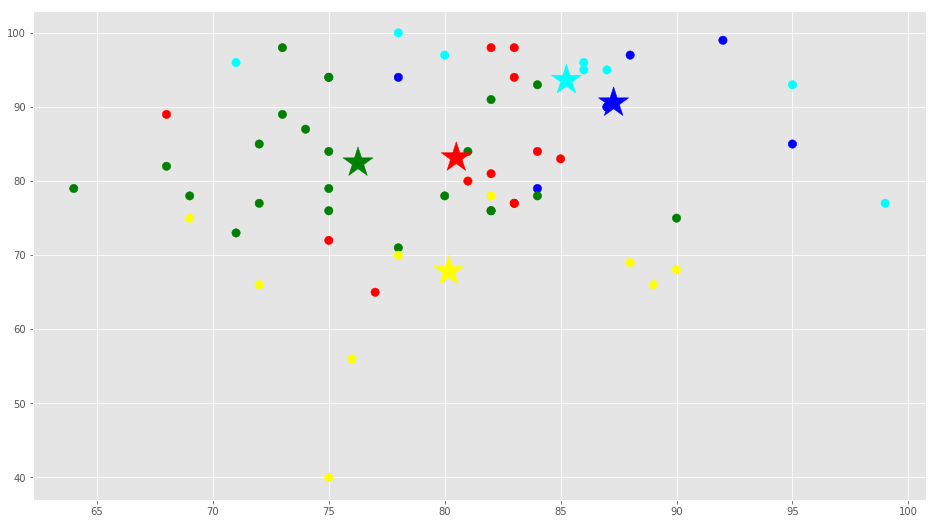

In [31]:
# Se observa como se distribuyen desde la perspectiva O,E

f1 = dominios['O'].values
f2 = dominios['E'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

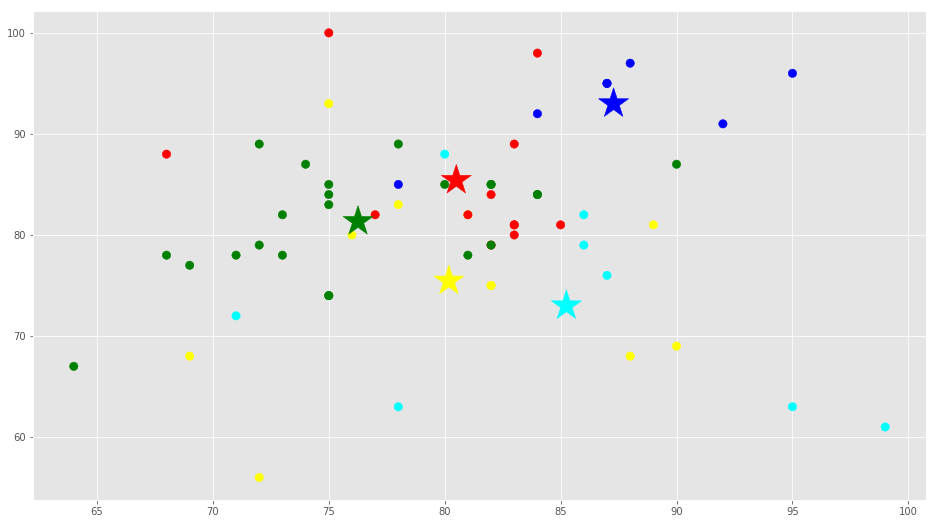

In [32]:
# Se observa como se distribuyen desde la perspectiva O,A

f1 = dominios['O'].values
f2 = dominios['A'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

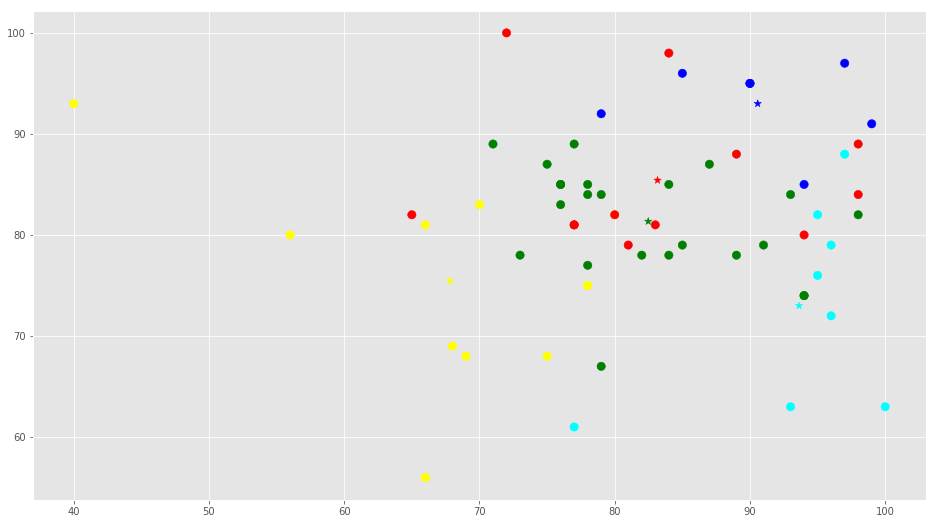

In [33]:
# Se observa como se distribuyen desde la perspectiva E,A

f1 = dominios['E'].values
f2 = dominios['A'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=60)
plt.show()

In [34]:
# Se observa la cantidad de elementos en cada cluster

copy =  pd.DataFrame()
copy['usuario']=dominios['Name'].values
copy['label'] = kmeans.labels_;

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,12
1,green,23
2,blue,7
3,cyan,8
4,yellow,11


In [35]:
n_grupos = int(round(cantidadGrupo['cantidad'].mean()))
n_grupos

12

In [36]:
# Se crea un dataframe que contenga la columna del cluster al que pertence cada elemento

cluster_map = dominios
cluster_map['cluster'] = kmeans.labels_
cluster_map = cluster_map[['Name', 'N', 'E', 'O','A','C', 'Categoria','cluster']]

cluster_map.head(5)

,Name,N,E,O,A,C,Categoria,cluster
0,José Estean Calle Chuchuca,73,85,95,96,93,A,2
1,Pablo Sebastian Calle Ortega,73,40,75,93,69,A,4
2,Tatiana Domenica Cardenas Jho,61,77,83,81,98,C,0
3,Francis Mateo Cordova Alvarez,83,78,82,75,71,N,4
4,Wilmer Jhon Durazno Zapatanga,81,76,82,85,90,C,1


In [37]:
cluster_map.describe()

,N,E,O,A,C,cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,73.245902,82.360656,80.245902,81.327869,82.590164,1.721311
std,10.579313,11.696200,7.331793,9.191883,12.260203,1.403937
min,45.000000,40.000000,64.000000,56.000000,47.000000,0.000000
25%,66.000000,76.000000,75.000000,78.000000,75.000000,1.000000
50%,74.000000,81.000000,81.000000,82.000000,83.000000,1.000000
75%,81.000000,93.000000,84.000000,87.000000,90.000000,3.000000
max,100.000000,100.000000,99.000000,100.000000,106.000000,4.000000


In [38]:
groups = cluster_map[['N','E','O','A','C']].copy()
groups = np.array_split(groups, n_grupos)

groups[0]


,N,E,O,A,C
0,73,85,95,96,93
1,73,40,75,93,69
2,61,77,83,81,98
3,83,78,82,75,71
4,81,76,82,85,90
5,71,84,81,78,77


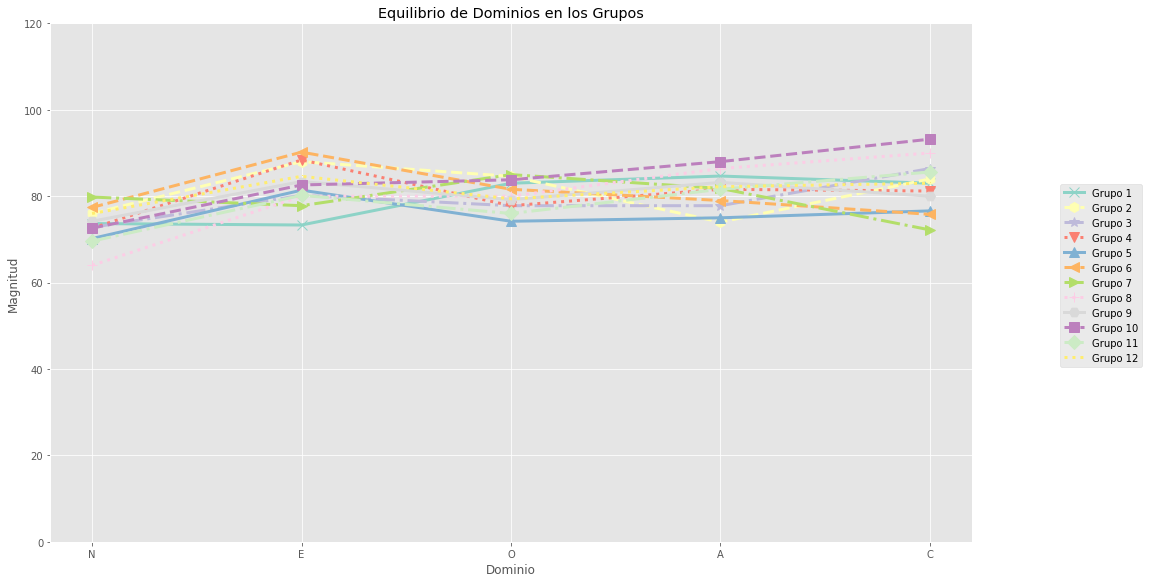

In [39]:
# DOMINIOS SIN EQUILIBRAR

# number of variable
categories= ['N', 'E', 'O', 'A', 'C']
N = 5

fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])
plt.xticks([1,2,3,4,5], categories)

my_palette = plt.cm.get_cmap("Set3", n_grupos)
marker = itertools.cycle(('x','h','*','v','^','<','>','+','H','s','D',',','p','o','|','2','1','.','d','4','_','3'))
line= itertools.cycle(('-','--','-.',':'))

for i in range(n_grupos):

    values=groups[i].mean()
    ax.plot([1, 2, 3, 4, 5], values, linestyle=line.next(), marker=marker.next(), color=my_palette(i), lw=3, ms=10, label=("Grupo " + str(i+1)))


ax.set_xlim(0.8, 5.2)
ax.set_ylim(0, 120)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.19, 0.7))

plt.title("Equilibrio de Dominios en los Grupos")
plt.ylabel("Magnitud")
plt.xlabel("Dominio")

plt.savefig("/var/www/html/desq_lines.png")

In [40]:
categories

['N', 'E', 'O', 'A', 'C']

In [47]:
# Se crean N grupos equilibrando los dominios de cada grupo.
# N es el número de perfiles C

kf = StratifiedKFold(n_splits=n_grupos, shuffle=True)

cluster_map['group_id'] = 0
group_id =0

for _, test_index in kf.split(cluster_map, cluster_map['cluster']):
    cluster_map.loc[test_index,'group_id'] = group_id
    group_id += 1

# Se observa la cantidad de integrantes en cada grupo

cluster_map.groupby(['group_id']).count()

,Name,N,E,O,A,C,Categoria,cluster
group_id,,,,,,,,
0,5,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5,5
2,6,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6,6
4,4,4,4,4,4,4,4,4
5,6,6,6,6,6,6,6,6
6,6,6,6,6,6,6,6,6
7,5,5,5,5,5,5,5,5
8,4,4,4,4,4,4,4,4


In [48]:
# Se crea una lista que contiene a los grupos

show_groups = cluster_map[['Name', 'N', 'E', 'O', 'A', 'C','cluster','group_id']].copy()
show_groups.columns = ['Nombre', 'N','E','O','A','C','Cluster_id','Grupo_id']

groups=[]

for k, gru in show_groups.groupby('Grupo_id'):
    groups.append(gru)
#print(groups)

# Gráficos

[76.0, 70.4, 84.6, 81.0, 85.0, 76.0]
[73.8, 83.2, 81.4, 83.4, 85.6, 73.8]
[76.0, 81.83333333333333, 80.5, 84.16666666666667, 84.83333333333333, 76.0]
[69.66666666666667, 82.66666666666667, 80.0, 82.5, 85.33333333333333, 69.66666666666667]
[71.25, 80.75, 79.0, 80.0, 79.25, 71.25]
[72.16666666666667, 85.33333333333333, 78.5, 81.0, 77.0, 72.16666666666667]
[75.5, 85.83333333333333, 83.0, 83.16666666666667, 77.16666666666667, 75.5]
[74.6, 83.4, 72.6, 80.6, 85.0, 74.6]
[64.25, 76.0, 74.75, 74.0, 79.5, 64.25]
[76.83333333333333, 86.66666666666667, 81.66666666666667, 79.5, 83.83333333333333, 76.83333333333333]
[67.5, 90.75, 84.25, 87.0, 84.0, 67.5]
[78.25, 78.75, 82.0, 77.5, 85.0, 78.25]


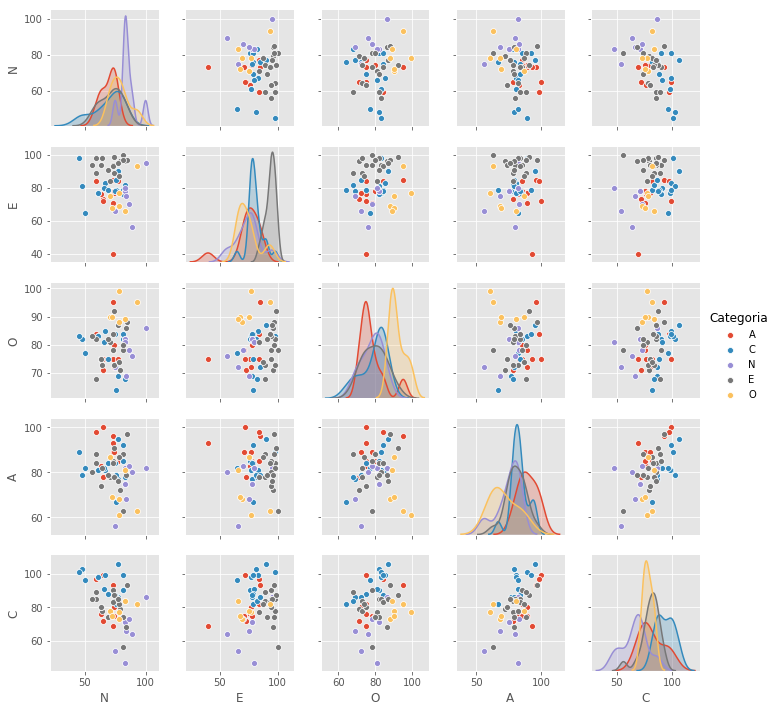

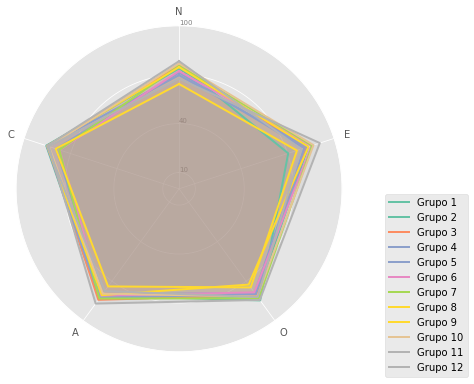

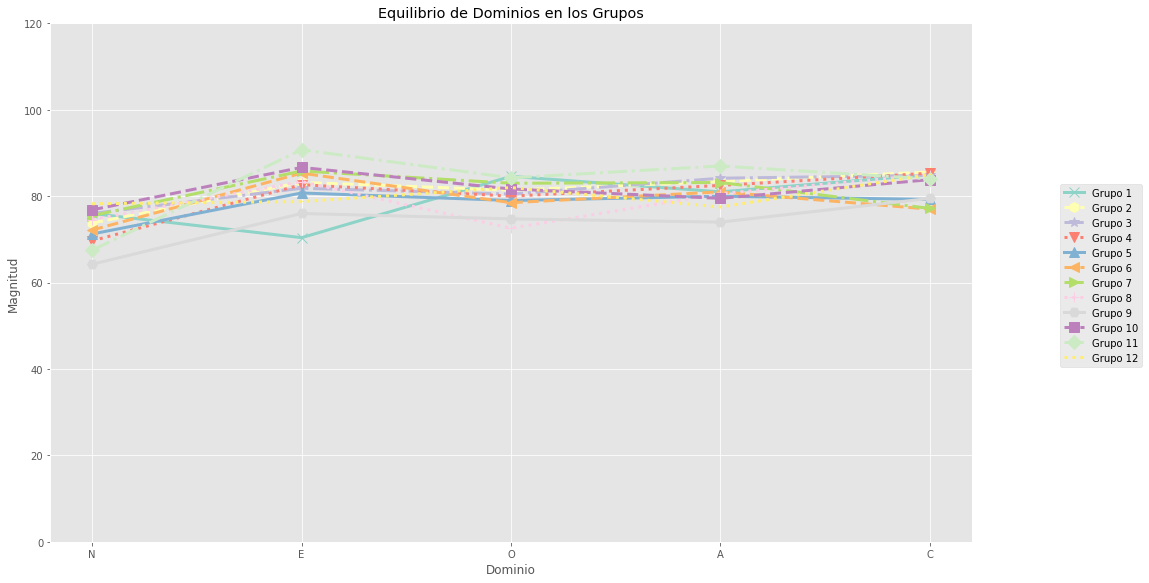

In [49]:
# DISTRIBUCIÓN DE LOS DOMINIOS

sb.pairplot(dominios, height=2, hue='Categoria', vars=["N","E","O","A","C"], kind='scatter')

plt.savefig("/var/www/html/distribución.png")

# NÚMERO DE ESTUDIANTES

# Se cuenta cuantos estudiantes hay por dominio

dominios_group = dominios.groupby(['Categoria']).count()
dominios_group

# Se grafica cuantos estudiantes hay por dominio

plt.figure(figsize=(8,6))
dominios_group['A'].plot(kind='bar')
plt.grid()
plt.title("Numero de Estudiantes")
plt.ylabel("Numero")
plt.xlabel("Dominio")

plt.savefig("/var/www/html/numero_estudiantes.png")


# PENTÁGONOS DE LOS DOMINIOS


clusters = cluster_map[['group_id', 'N', 'E', 'O','A','C']]
clusters = clusters.groupby('group_id', as_index=False).mean()

# ------- PART 1: Create background
 
# number of variable
categories=list(clusters)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,40,70,100,120], ["10","40","70","100","120"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", n_grupos)
for i in range(n_grupos):
    
   
    values=clusters.loc[i].drop('group_id').values.flatten().tolist()
    values += values[:1]
    print values
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=("Grupo " + str(i+1)), color=my_palette(i))
    ax.fill(angles, values, alpha=0.09)

  
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.5))

plt.savefig("/var/www/html/pentagono.png")

# EQUILIBRIO DE LOS DOMINIOS

fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])
plt.xticks([1,2,3,4,5], categories)

my_palette = plt.cm.get_cmap("Set3", n_grupos)
marker = itertools.cycle(('x','h','*','v','^','<','>','+','H','s','D',',','p','o','|','2','1','.','d','4','_','3'))
line= itertools.cycle(('-','--','-.',':'))

for i in range(n_grupos):

    values=clusters.loc[i].drop('group_id').values.flatten().tolist()
    #values += values[:1]
    ax.plot([1, 2, 3, 4, 5], values, linestyle=line.next(), marker=marker.next(), color=my_palette(i), lw=3, ms=10, label=("Grupo " + str(i+1)))


ax.set_xlim(0.8, 5.2)
ax.set_ylim(0, 120)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.19, 0.7))

plt.title("Equilibrio de Dominios en los Grupos")
plt.ylabel("Magnitud")
plt.xlabel("Dominio")

plt.savefig("/var/www/html/equilib_lines.png")

# Se exportan los datos como json

In [44]:
numero_de_estudiantes = len(dominios)

dict1 = {'n_grupos':n_grupos, 'n_estudiantes': numero_de_estudiantes}

print json.dumps(dict1)

{"n_estudiantes": 61, "n_grupos": 12}


In [45]:
dict2 = {}
keys = range(n_grupos)
values = groups
for i in keys:
        dict2[i] = values[i].to_html(classes='table table-striped')
print(dict2)

{0: u'<table border="1" class="dataframe table table-striped">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Nombre</th>\n      <th>N</th>\n      <th>E</th>\n      <th>O</th>\n      <th>A</th>\n      <th>C</th>\n      <th>Cluster_id</th>\n      <th>Grupo_id</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Jos\xe9 Estean Calle Chuchuca</td>\n      <td>73</td>\n      <td>85</td>\n      <td>95</td>\n      <td>96</td>\n      <td>93</td>\n      <td>2</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Pablo Sebastian Calle Ortega</td>\n      <td>73</td>\n      <td>40</td>\n      <td>75</td>\n      <td>93</td>\n      <td>69</td>\n      <td>4</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Tatiana Domenica Cardenas Jho</td>\n      <td>61</td>\n      <td>77</td>\n      <td>83</td>\n      <td>81</td>\n      <td>98</td>\n      <td>0</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>4</th

In [46]:
dict2.update(dict1)
print(dict2)

myfile = open('/home/kevin/Escritorio/data.json','w+')

#create your dict

json.dump(dict2, myfile)
myfile.close()

{0: u'<table border="1" class="dataframe table table-striped">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Nombre</th>\n      <th>N</th>\n      <th>E</th>\n      <th>O</th>\n      <th>A</th>\n      <th>C</th>\n      <th>Cluster_id</th>\n      <th>Grupo_id</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Jos\xe9 Estean Calle Chuchuca</td>\n      <td>73</td>\n      <td>85</td>\n      <td>95</td>\n      <td>96</td>\n      <td>93</td>\n      <td>2</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Pablo Sebastian Calle Ortega</td>\n      <td>73</td>\n      <td>40</td>\n      <td>75</td>\n      <td>93</td>\n      <td>69</td>\n      <td>4</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Tatiana Domenica Cardenas Jho</td>\n      <td>61</td>\n      <td>77</td>\n      <td>83</td>\n      <td>81</td>\n      <td>98</td>\n      <td>0</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>4</th